# The purpose of this code is visual Decision tree algorithms.

In [16]:
import os
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import decimal
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


In [17]:
df0 = pd.read_csv('titanic.csv')

In [20]:
df0

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [18]:
df = df0.drop(columns = ["Name"])
warnings.filterwarnings("ignore")

list_of_features_string = ['Sex']

transformer = make_column_transformer(
    (OneHotEncoder(), list_of_features_string),
    remainder='passthrough')

transformer_one_hot = transformer.fit_transform(df)
transformer_one_hot_df = pd.DataFrame(transformer_one_hot, columns=transformer.get_feature_names())

In [19]:
transformer_one_hot_df

,onehotencoder__x0_female,onehotencoder__x0_male,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
882,0.0,1.0,0.0,2.0,27.0,0.0,0.0,13.0000
883,1.0,0.0,1.0,1.0,19.0,0.0,0.0,30.0000
884,1.0,0.0,0.0,3.0,7.0,1.0,2.0,23.4500
885,0.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [21]:
X_new = transformer_one_hot_df.drop(columns = ["Survived"])
y_new = transformer_one_hot_df["Survived"]

In [22]:
X_train, X_test,y_train, y_test = train_test_split(X_new,y_new, test_size=0.2, shuffle=True)

In [23]:
DT_classifer = tree.DecisionTreeClassifier()

In [24]:
fitted_DT = DT_classifer.fit(X_train, y_train)

In [25]:
y_predicted = fitted_DT.predict(X_test)

In [26]:
first_prediction = accuracy_score(y_test, y_predicted)
print(first_prediction)

0.7752808988764045


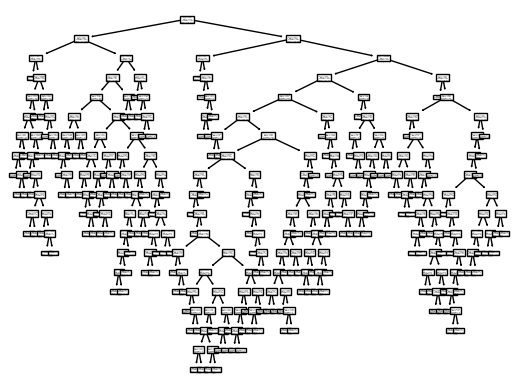

In [36]:

a = tree.plot_tree(fitted_DT)

In [37]:
a

[Text(0.35381781304632864, 0.9736842105263158, 'X[1] <= 0.5\ngini = 0.474\nsamples = 709\nvalue = [435, 274]'),
 Text(0.1399694055944056, 0.9210526315789473, 'X[2] <= 2.5\ngini = 0.385\nsamples = 254\nvalue = [66, 188]'),
 Text(0.04895104895104895, 0.868421052631579, 'X[3] <= 2.5\ngini = 0.099\nsamples = 134\nvalue = [7, 127]'),
 Text(0.04195804195804196, 0.8157894736842105, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.055944055944055944, 0.8157894736842105, 'X[6] <= 28.856\ngini = 0.086\nsamples = 133\nvalue = [6, 127]'),
 Text(0.04195804195804196, 0.7631578947368421, 'X[6] <= 28.231\ngini = 0.171\nsamples = 53\nvalue = [5, 48]'),
 Text(0.03496503496503497, 0.7105263157894737, 'X[4] <= 0.5\ngini = 0.142\nsamples = 52\nvalue = [4, 48]'),
 Text(0.02097902097902098, 0.6578947368421053, 'X[3] <= 24.5\ngini = 0.054\nsamples = 36\nvalue = [1, 35]'),
 Text(0.013986013986013986, 0.6052631578947368, 'X[3] <= 23.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.006993006993006993

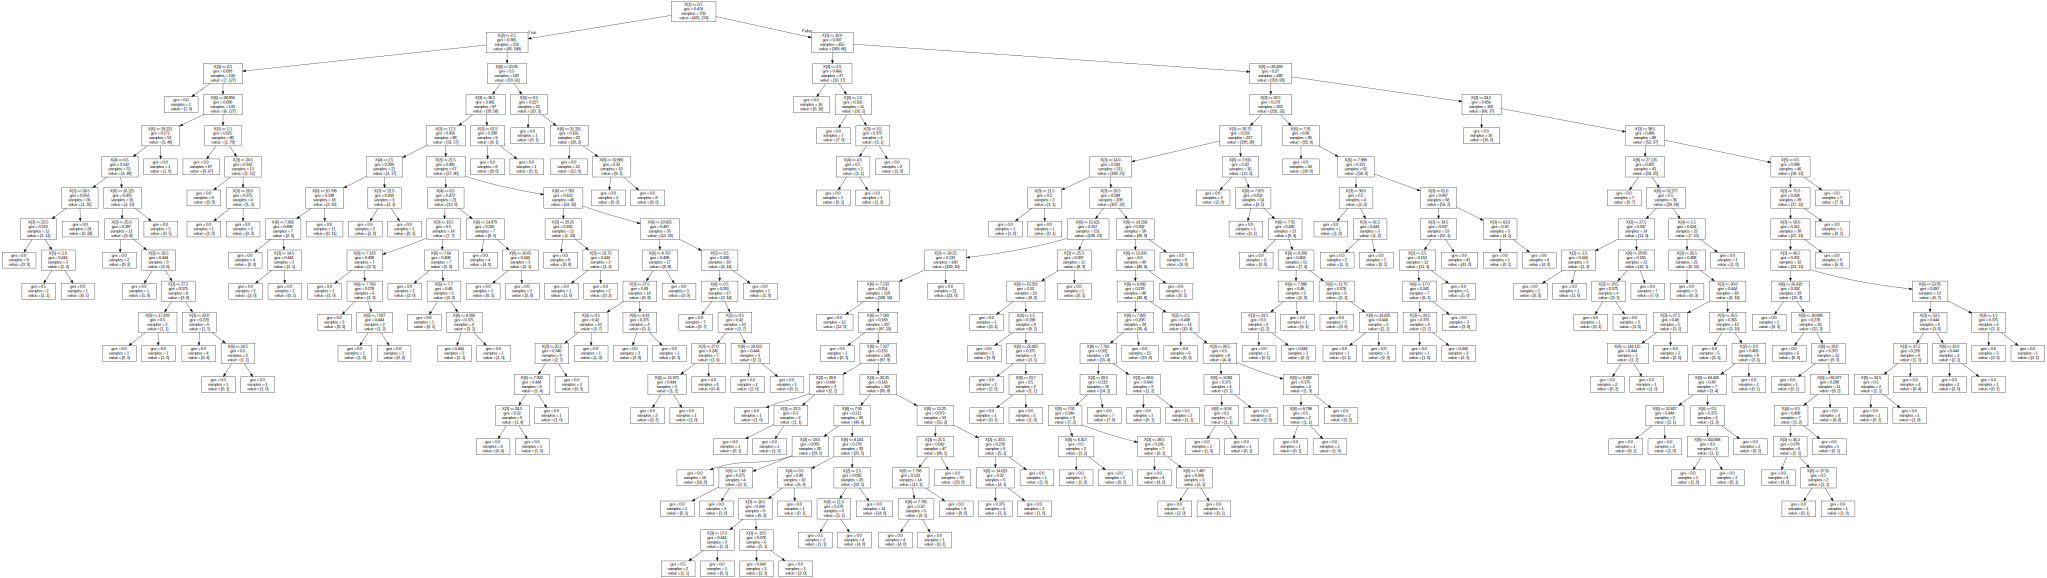

In [34]:
import graphviz
dot_data = tree.export_graphviz(DT_classifer)
# Draw graph
graph = graphviz.Source(dot_data) 
graph

In [38]:
DT_classifer4 = tree.DecisionTreeClassifier(max_depth=4)

In [39]:
fitted_DT4 = DT_classifer4.fit(X_train, y_train)

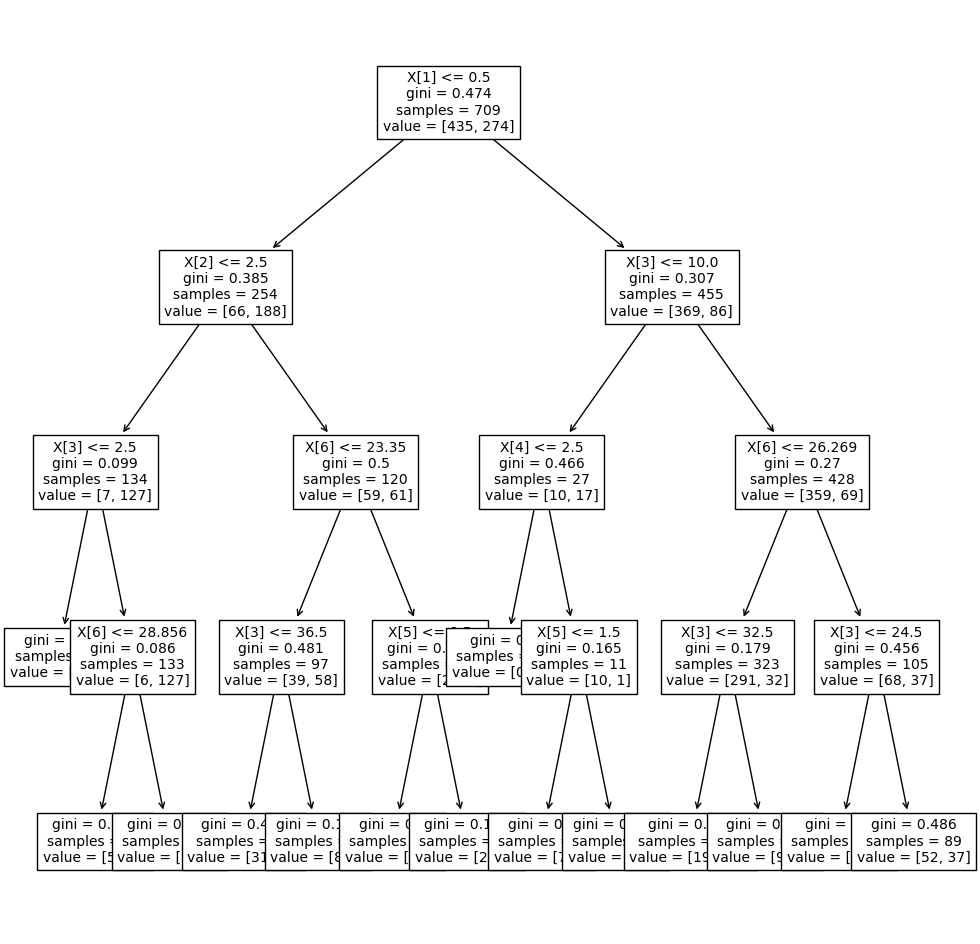

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(DT_classifer4, fontsize=10)
plt.show()